In [49]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import cmocean
import math
from matplotlib.patches import Ellipse
import gsw
#for removing warnings
import warnings

# Mooring data

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
#data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'
data_path1 = 's3://velocity-u.zarr'
data_path2 = 's3://velocity-v.zarr'
data_path3 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
data_path4 = 's3://data/modmoor_varianceII.zarr'

remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)
remote_files4 = fsg.glob(data_path4)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)
store4 = s3fs.S3Map(root=data_path4, s3=fsg, check=False)

du = xr.open_zarr(store=store1, consolidated=True)
dv = xr.open_zarr(store=store2, consolidated=True)
dzz = xr.open_zarr(store=store3, consolidated=True)
dvv = xr.open_zarr(store=store4, consolidated=True)

In [3]:
bathym = dzz.mbathy.isel(x=slice(200,1400),y=slice(650,1800)).squeeze(axis=0)

In [4]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, 
                             #combine='by_coords',
                             compat='override')
    return dset

In [5]:
d15 = open_s3fs('mooring_barents/A-TWAIN_2015-2017_AT200-3_22-118m_ACDP_16640.nc')
d13 = open_s3fs('mooring_barents/A-TWAIN_2013-2015_AT200-2_14-121m_ACDP_16640.nc')
d17 = open_s3fs('mooring_barents/A-TWAIN_2017-2019_AT200-4_20-167m_ACDP_16640.nc')

y1 = open_s3fs('mooring_yermark/Y1.nc') # have information on temp and salinity 
y2 = open_s3fs('mooring_yermark/Y2.nc')
y3 = open_s3fs('mooring_yermark/Y3.nc')

MB = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MB.nc') # have information on temp and salinity 
MW = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MW.nc')
MN = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MN.nc')
MS = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MS.nc')

ANO18 = open_s3fs('moorings_/AON_Sig_ADCP_BS3_2016_2018.nc')
ANO16 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2014_2016.nc')
ANO14 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2013_2014.nc')

E3 = open_s3fs('mooring_nord_svalbard/NL_E3.nc') # have information on temp and salinity 
W3 = open_s3fs('mooring_nord_svalbard/NL_W3.nc')
E2 = open_s3fs('mooring_nord_svalbard/NL_E2.nc') 
W2 = open_s3fs('mooring_nord_svalbard/NL_W2.nc')
E1 = open_s3fs('mooring_nord_svalbard/NL_E1.nc') 
W1 = open_s3fs('mooring_nord_svalbard/NL_W1.nc') 

grid = open_s3fs('smooth_grid_karen.nc')

In [85]:
p_list = [(31.13247,81.24202),
          (31.13533,81.24255),
          (31.14506,81.24587)
          ,(011.1189, 69.5289),
          (013.16845,68.58759),
          (013.19866,68.56109),
          (012.45082,68.50128),
          (5.48733,80.03876),
          (5.56333,79.44093),
          (24.00000,81.24925),
          (18.29052,81.10979),
          (23.59853,81.30813),
          (18.23789,81.22686),
          (23.59982,81.35453),
          (18.23730,81.27356)]

In [59]:
y1_s = y1.PSAL.mean('TIME')
y1_t = y1.TEMP.mean('TIME')
y1_p = y1.PRES

y2_s = y2.PSAL.mean('TIME')
y2_t = y2.TEMP.mean('TIME')
y2_p = y2.PRES

y3_s = y3.PSAL.mean('TIME')
y3_t = y3.TEMP.mean('TIME')
y3_p = y3.PRES

MB_s = MB.PSAL.mean('TIME')
MB_t = MB.TEMP.mean('TIME')
MB_p = MB.PRES_ins

MW_s = MW.PSAL.mean('TIME')
MW_t = MW.TEMP.mean('TIME')
MW_p = MW.PRES_ins

MN_s = MN.PSAL.mean('TIME')
MN_t = MN.TEMP.mean('TIME')
MN_p = MN.PRES_ins

#MS_s = MS.PSAL

E3_s = E3.PSAL.mean('TIME')
E3_t = E3.TEMP.mean('TIME')
E3_p = E3.PRES_ins

W3_s = W3.PSAL.mean('TIME')
W3_t = W3.TEMP.mean('TIME')
W3_p = W3.PRES_ins

E2_s = E2.PSAL.mean('TIME')
E2_t = E2.TEMP.mean('TIME')
E2_p = E2.PRES_ins

W2_s = W2.PSAL.mean('TIME')
W2_t = W2.TEMP.mean('TIME')
W2_p = W2.PRES_ins

E1_s = E1.PSAL.mean('TIME')
E1_t = E1.TEMP.mean('TIME')
E1_p = E1.PRES_ins
#W1_s = W1.PSAL

In [121]:
MB_t

<xarray.DataArray 'TEMP' (DEPTH: 272)>
dask.array<mean_agg-aggregate, shape=(272,), dtype=float64, chunksize=(272,), chunktype=numpy.ndarray>
Coordinates:
  * DEPTH    (DEPTH) float64 70.0 80.0 90.0 100.0 ... 2.76e+03 2.77e+03 2.78e+03

In [123]:
y1_t

<xarray.DataArray 'TEMP' (DEPTH: 317)>
dask.array<mean_agg-aggregate, shape=(317,), dtype=float64, chunksize=(317,), chunktype=numpy.ndarray>
Coordinates:
  * DEPTH    (DEPTH) float64 0.0 4.947 9.894 ... 1.548e+03 1.552e+03 1.557e+03

In [ ]:
gsw.density.rho(SA, CT, p)

In [ ]:
p = gsw.p_from_z(depth,lat) #depth må være positiv oppover, løses med *(-1)

In [100]:
-E1_s['DEPTH']

<xarray.DataArray 'DEPTH' (DEPTH: 26)>
array([ -30.,  -40.,  -50.,  -60.,  -70.,  -80.,  -90., -100., -110.,
       -120., -130., -140., -150., -160., -170., -180., -190., -200.,
       -210., -220., -230., -240., -250., -260., -270., -280.])
Coordinates:
  * DEPTH    (DEPTH) float64 30.0 40.0 50.0 60.0 ... 250.0 260.0 270.0 280.0
Attributes:
    standard_name:  Z
    units:          m
    long_name:      vertical distance below the sea surface
    axis:           Z
    positive:       down

In [126]:
# function to get the density with depth fro the relevant moorings
def dens(sal, temp, i):
    lat = p_list[i][1]
    lon = p_list[i][0]
    depth = -sal['DEPTH']
    pres = gsw.p_from_z(depth,lat)
    sa = gsw.SA_from_SP(sal, pres, lon, lat)
    dens = gsw.density.sigma0(sa,temp)
    
    #dens = gsw.density.rho_t_exact(sa,temp,pres)
    return dens

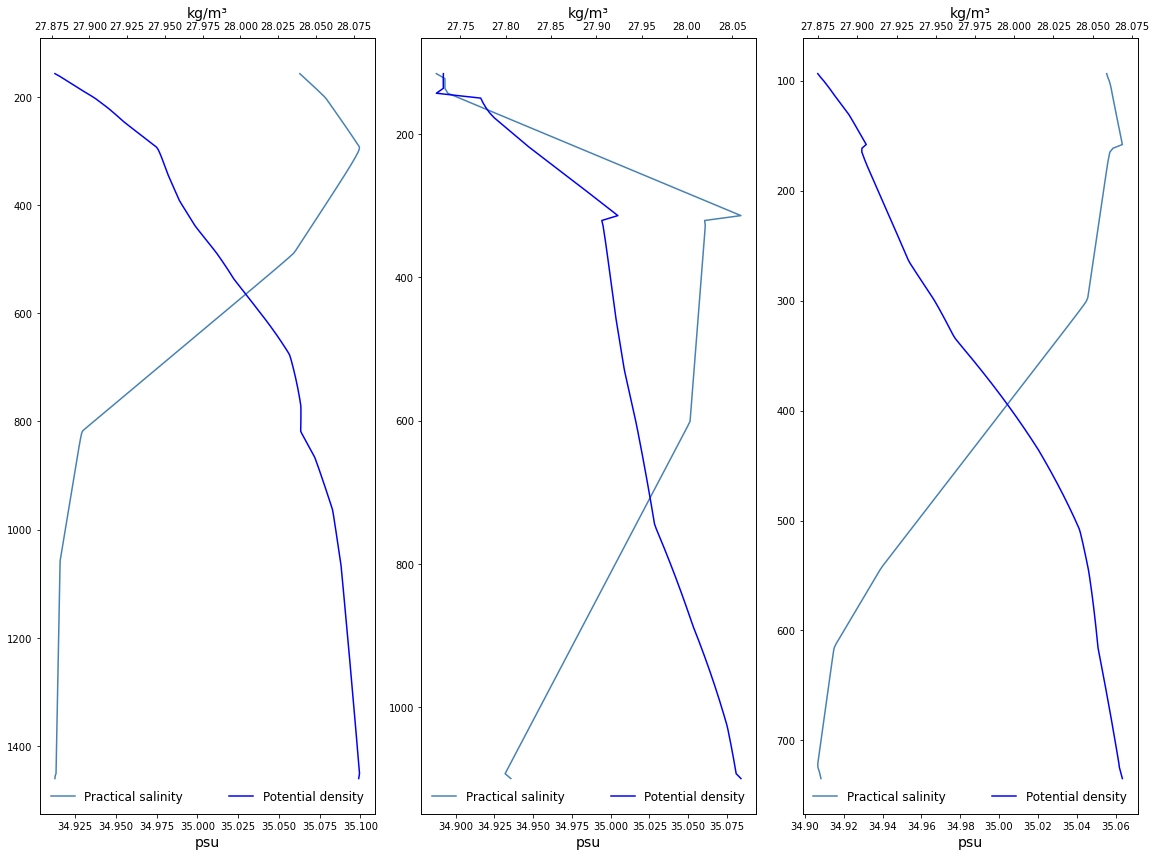

In [149]:
# SALINITY PROFILE YERMARK
warnings.simplefilter("ignore")

fig, axes = plt.subplots(1,3,figsize=(16,12))
sl = [y1_s, y2_s, y3_s]
tl = [y1_t, y2_t, y3_t]
for axs, i, b, t in zip(axes.flat, range(3),[1535,1209,850],[54,54,19]):
    rho = dens(sl[i],tl[i],i)
    dyp_mr = np.linspace(t,b,len(sl[i].DEPTH))
    axs.plot(sl[i],dyp_mr, color = 'steelblue', label='Practical salinity')
    ax2 = axs.twiny()
    ax2.plot(rho,dyp_mr, color = 'b', label ='Potential density')
    axs.invert_yaxis()
    axs.set_xlabel('psu', fontsize=14)
    ax2.set_xlabel('kg/m³', fontsize=14)
    axs.legend(frameon=False, fontsize=12, loc="lower left") 
    ax2.legend(frameon=False, fontsize=12, loc="lower right") 
    
fig.tight_layout()

plt.savefig('haloclin_dens_yermark.pdf', dpi = 300)

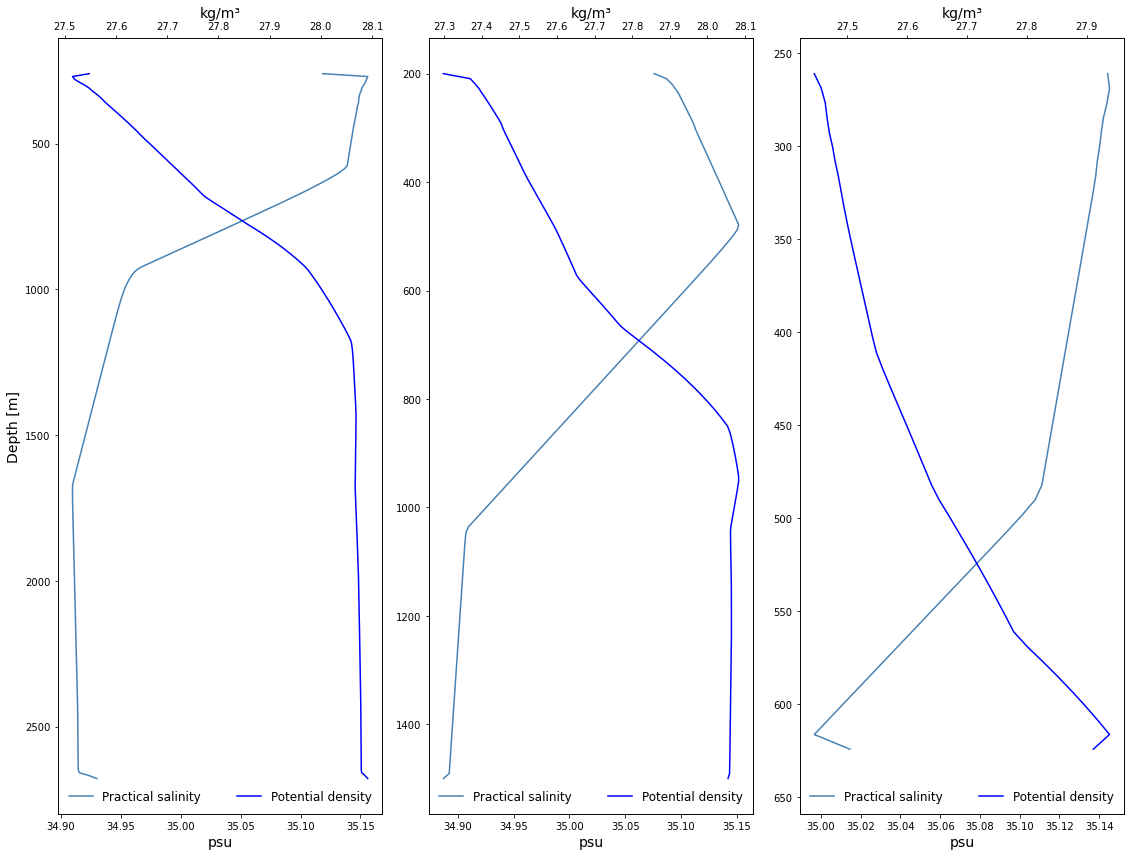

In [147]:
#SALINITY PROFILES LOFOTEN 
warnings.simplefilter("ignore")

fig, axes = plt.subplots(1,3,figsize=(16,12))
axes[0].set_ylabel('Depth [m]', fontsize=14)
sl = [MB_s, MW_s, MN_s]
tl = [MB_t, MW_t, MN_t]
for axs, i, b, t in zip(axes.flat, range(3), [2935,1500,640], [260,200,190]):
    rho = dens(sl[i],tl[i],i)
    dyp_mr = np.linspace(t,b,len(sl[i].DEPTH))
    axs.plot(sl[i],dyp_mr, color = 'steelblue', label='Practical salinity')
    ax2 = axs.twiny()
    ax2.plot(rho,dyp_mr, color = 'b', label ='Potential density')
    axs.invert_yaxis()
    axs.set_xlabel('psu', fontsize=14)
    ax2.set_xlabel('kg/m³', fontsize=14)
    axs.legend(frameon=False, fontsize=12, loc="lower left") 
    ax2.legend(frameon=False, fontsize=12, loc="lower right") 
    
fig.tight_layout()

plt.savefig('haloclin_dens_lofoten.pdf', dpi = 300)

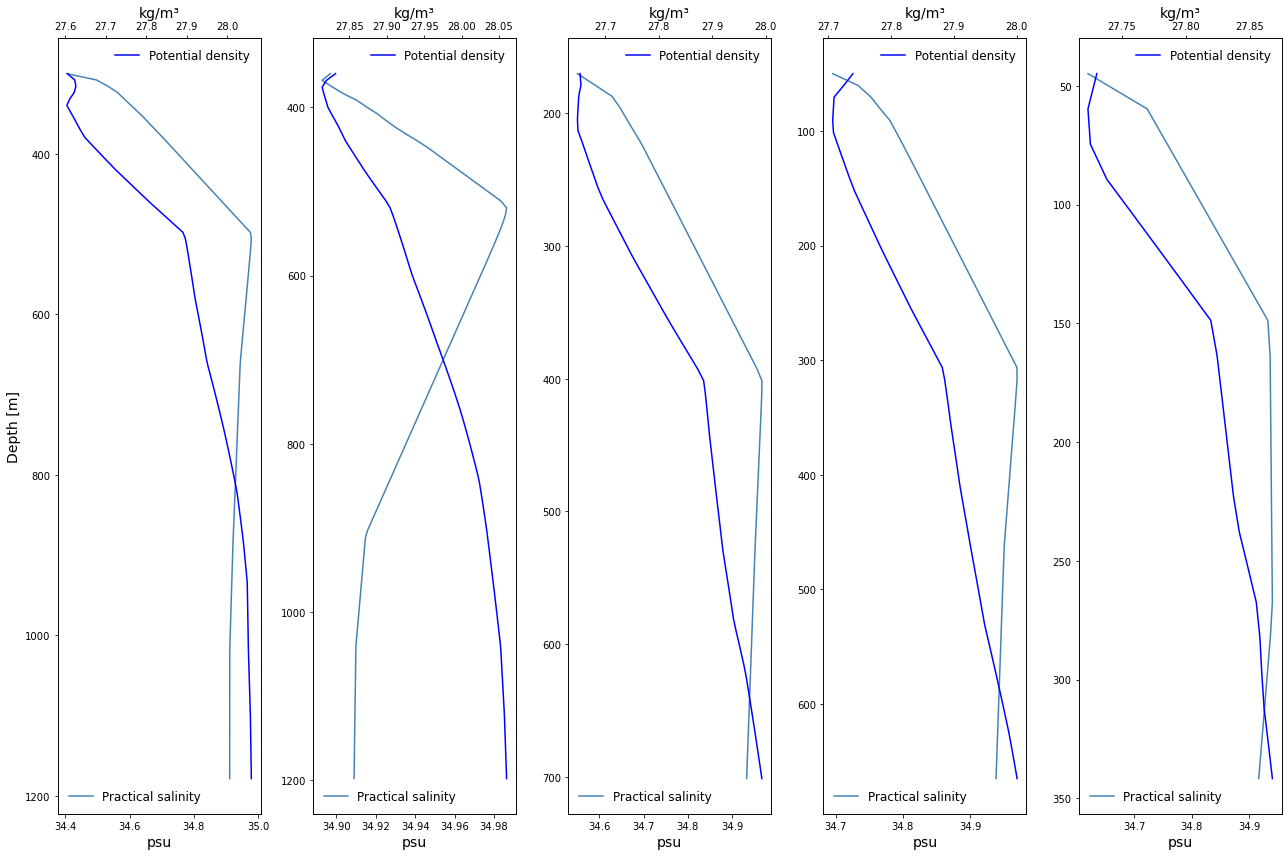

In [152]:
# SALINITY PROFILES NORTH OF SVALBARD
warnings.simplefilter("ignore")

sl = [E3_s, W3_s, E2_s, W2_s, E1_s]
tl = [E3_t, W3_t, E2_t, W2_t, E1_t]

fig, axes = plt.subplots(1,5,figsize=(18,12))
axes[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i, b, t in zip(axes.flat,range(5), [1202,1222,727,706,401],[300,360,170,50,30,50]):
    rho = dens(sl[i],tl[i],i)
    dyp_mr = np.linspace(t,b,len(sl[i].DEPTH))
    axs.plot(sl[i],dyp_mr, color = 'steelblue', label='Practical salinity')
    ax2 = axs.twiny()
    ax2.plot(rho,dyp_mr, color = 'b', label ='Potential density')
    axs.invert_yaxis()
    axs.set_xlabel('psu', fontsize=14)
    ax2.set_xlabel('kg/m³', fontsize=14)
    axs.legend(frameon=False, fontsize=12, loc="lower left") 
    ax2.legend(frameon=False, fontsize=12, loc="upper right") 
    
fig.tight_layout()

plt.savefig('haloclin_dens_Nsvalbard.pdf', dpi = 300)